# Importing

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Reading Data Mordred 2D

In [16]:
drugs = pd.read_csv('/home/gustavo/github/mestrado/reworks/data/fda_approved_mordred_2d.csv')
print(drugs.shape)
drugs.head()

(1895, 1628)


/tmp/ipykernel_375312/1975356661.py:1: DtypeWarning: Columns (104,105,106,107,108,109,110,111,112,153,154,155,156,157,162,163,164,165,166,171,172,173,174,175,180,181,182,183,184,189,190,191,192,193,198,199,200,201,202,203,204,205,206,207,208,209,210,211,216,217,218,219,220,225,226,227,228,229,234,235,236,237,238,243,244,245,246,247,311,312,313,314,315,316,317,318,319,369,370,371,372,373,378,379,380,381,382,387,388,389,390,391,396,397,398,399,400,405,406,407,408,409,414,415,416,417,418,419,420,421,422,423,424,425,426,427,432,433,434,435,436,441,442,443,444,445,450,451,452,453,454,459,460,461,462,463,475,476,477,478,479,483,484,485,486,487,491,492,493,494,495,499,500,501,502,503,507,508,509,510,511,515,516,517,518,519,520,521,522,523,524,525,526,527,531,532,533,534,535,539,540,541,542,543,547,548,549,550,551,555,556,557,558,559,571,572,573,574,575,579,580,581,582,583,587,588,589,590,591,595,596,597,598,599,603,604,605,606,607,611,612,613,614,615,616,617,618,619,620,621,622,623,627,628,62

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


# Separating explanatory and response variables

In [17]:
flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

drugs_features = drugs.drop(labels=flag_columns, axis = 1)
print(drugs_features.shape)
drugs_features.head()

(1895, 1613)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [18]:
response_variable = drugs[flag_columns].drop(columns=["ROMol"])
print(response_variable.shape)
response_variable.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [19]:
explanatory_variables = drugs_features.copy()
explanatory_variables.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0,3,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9,0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18,2,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18,2,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0,1,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10,1,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9,0,12.0,9.0,3.111111,1.000000


In [20]:
explanatory_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Columns: 1613 entries, ABC to mZagreb2
dtypes: bool(2), float64(769), int64(313), object(529)
memory usage: 23.3+ MB


As we can see, we have some objects type we might want to deal with.

In [21]:
def convert_non_numeric_to_nan(df):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

    for column in non_numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [22]:
convert_non_numeric_to_nan(explanatory_variables)
explanatory_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Columns: 1613 entries, ABC to mZagreb2
dtypes: bool(2), float64(1298), int64(313)
memory usage: 23.3 MB


In [23]:
# Finalmente, dropando dois descritores
bool_cols_to_drop =  ['Lipinski', 'GhoseFilter']
explanatory_variables = explanatory_variables.drop(bool_cols_to_drop, axis=1)
explanatory_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Columns: 1611 entries, ABC to mZagreb2
dtypes: float64(1298), int64(313)
memory usage: 23.3 MB


# Scaling Variables

Scaling is necessary for KNN, but not necessary for Variance Filter.

In [24]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(explanatory_variables)

# Merging the column name with the scale 
explanatory_variables_scaled = pd.DataFrame(scaled_data, columns=explanatory_variables.columns)
print(explanatory_variables_scaled.shape)
explanatory_variables_scaled.head()

(1895, 1611)


/home/gustavo/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gustavo/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/gustavo/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


# Zero Variance Filter

In [25]:
def variance_threshold_selector(data, threshold=0.0):

    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [26]:
explanatory_variables_no_low_var = variance_threshold_selector(explanatory_variables_scaled)
print(explanatory_variables_no_low_var.shape)
explanatory_variables_no_low_var

(1895, 1396)


/home/gustavo/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/gustavo/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:120: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,5.471510,6.013591,-0.413307,2.729961,5.490473,0.161030,0.328148,5.490473,-0.268552,3.042120,...,1.875606,4.670508,5.965983,0.093368,8.551432,4.639370,5.149934,4.839798,6.293686,5.864819
1891,6.117874,5.438841,1.045198,1.587957,5.998145,0.338883,0.531591,5.998145,0.002735,3.216785,...,2.274972,4.078616,6.155242,0.304829,7.143037,6.327790,6.063508,5.937199,6.342458,5.985635
1892,6.147362,6.631406,6.879220,5.013968,5.826948,-0.747995,-0.644564,5.826948,-1.511958,3.205724,...,1.611651,4.348528,7.254724,-0.084288,10.505382,4.317766,5.474105,4.648946,8.441137,6.710526
1893,7.607401,6.577312,3.962209,3.871965,7.585244,0.443404,0.642610,7.585244,-0.044479,3.590985,...,2.413224,5.212013,7.916086,0.016349,13.086032,7.373003,7.360194,7.058456,7.815967,7.803117


# Filling NaN Values

A lot of molecules have NaN values

Therea re 1895 with at least one NaN value


<Axes: >

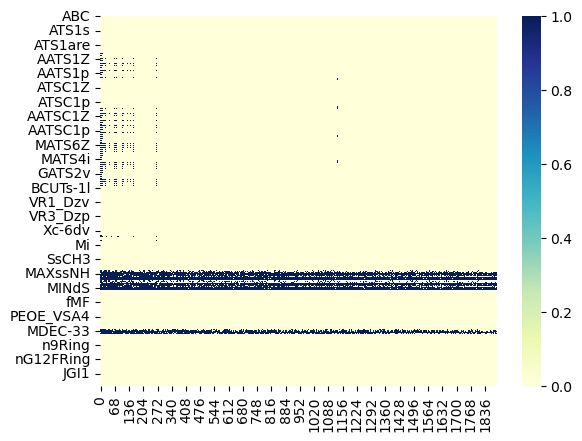

In [30]:
at_leastonenan_rows = explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)].shape[0]
print(f"Therea re {at_leastonenan_rows} with at least one NaN value")

sns.heatmap(explanatory_variables_no_low_var.isna().transpose(), cmap='YlGnBu')

# Dropping Columns That Are Mainly NaN

Some columsn are mostly filled by NaN values. These columns are useless and should be deleted. We will drop all columns that are 30% filled by Nan Values

In [31]:
def drop_columns_with_high_nan_count(df, fraction):
    threshold = df.shape[0]*fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return df.drop(columns, axis =1)

In [35]:
explanatory_variables_low_nan = drop_columns_with_high_nan_count(explanatory_variables_no_low_var, fraction=0.25)
print(explanatory_variables_low_nan.shape)
explanatory_variables_low_nan.head()


(1895, 1314)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


<Axes: >

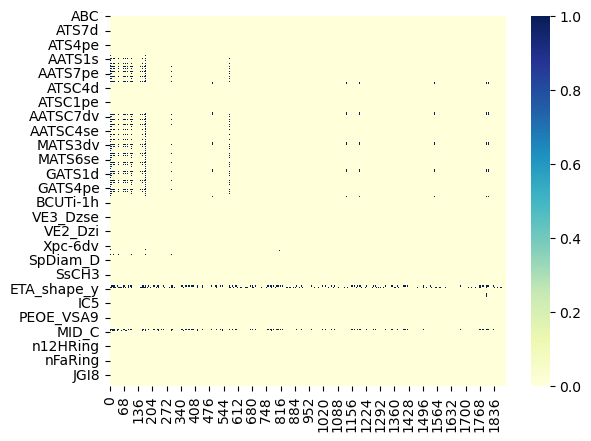

In [36]:
# we can then see how is the sparsity of our data using a heatmap
sns.heatmap(explanatory_variables_low_nan.isna().transpose(), cmap='YlGnBu')

# KNN

In [38]:
print(f"Number of NaN values: {explanatory_variables_low_nan.isna().sum().sum()}, versus total number {explanatory_variables_low_nan.shape[0]*explanatory_variables_low_nan.shape[1]}")

Number of NaN values: 12155, versus total number 2490030


In [39]:
from sklearn.impute import KNNImputer
selector = KNNImputer(n_neighbors=5)
explanatory_variables_fill_na = selector.fit_transform(explanatory_variables_low_nan)

In [40]:

explanatory_variables_no_na = pd.DataFrame(explanatory_variables_fill_na, columns=explanatory_variables_low_nan.columns)
print(explanatory_variables_no_na.shape)
explanatory_variables_no_na.head()

(1895, 1314)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.859841,-2.127739,-0.413307,2.729961,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.828642,-0.657103,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830
1,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.736728,-0.112096,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
2,-1.797923,-1.997448,-0.413307,-0.696050,-1.798430,-4.212761,-4.303048,-1.798430,-3.356506,-3.784874,...,-4.721561,-2.288258,-1.731005,0.434065,-0.412293,-1.672107,-1.805019,-1.792318,-1.314763,-1.688762
3,-1.893836,-2.144395,-0.413307,0.445954,-1.846731,-5.790809,-5.979210,-1.846731,-2.201681,-4.349566,...,-6.639064,-2.558838,-1.725239,-0.401573,-0.413438,-1.712307,-1.893429,-1.863888,-1.498028,-1.720279
4,-1.859841,-2.127739,-0.413307,-0.696050,-1.911295,-5.007595,-5.147299,-1.911295,-6.200189,-4.300061,...,-5.656406,-2.457134,-1.719581,0.060375,-0.413581,-1.752508,-1.863959,-1.851959,-1.367969,-1.814830


Number of NaN values in the dataset: 0


<Axes: >

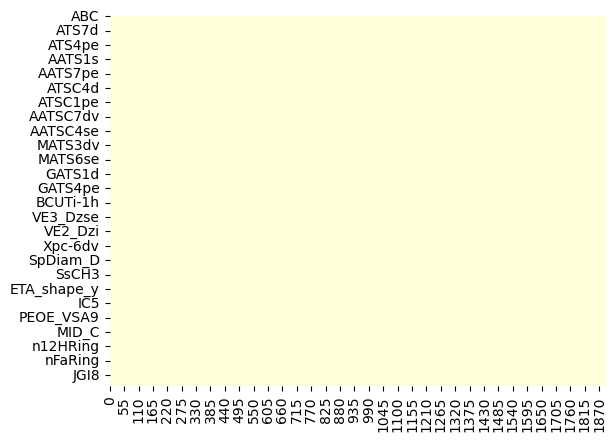

In [42]:
print(f"Number of NaN values in the dataset: {explanatory_variables_no_na.isna().sum().sum()}")
sns.heatmap(explanatory_variables_no_na.isna().transpose(), cmap='YlGnBu', cbar=False)

# Descale the Data

In [45]:
drugs_scaler = explanatory_variables[explanatory_variables_no_na.columns].copy()
print(drugs_scaler.shape)

# fitting the scaler object to temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

# descaling

explanatory_variables_descaled = descaler.inverse_transform(explanatory_variables_no_na)
explanatory_variables_descaled = pd.DataFrame(explanatory_variables_descaled, columns=explanatory_variables_no_na.columns)

print(explanatory_variables_descaled.shape)
explanatory_variables_descaled

(1895, 1314)
(1895, 1314)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,2.449490,2.449490,0.0,3.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,59.048347,6.560927,9.0,0.0,12.0,9.0,3.111111,1.000000
1,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,75.032028,7.503203,18.0,2.0,16.0,14.0,3.361111,1.333333
2,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,76.027277,8.447475,18.0,2.0,16.0,14.0,3.361111,1.333333
3,2.121320,2.340100,0.0,1.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,5.509388,22.328143,77.029920,7.002720,10.0,1.0,10.0,8.0,2.500000,1.250000
4,2.449490,2.449490,0.0,0.0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,6.188264,24.179697,78.013936,7.801394,9.0,0.0,12.0,9.0,3.111111,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,73.222407,55.918156,0.0,3.0,119.027589,2.484476,4.964968,119.027589,1.239871,5.463272,...,11.391808,153.940560,1414.518432,7.858436,62651.0,159.0,488.0,570.0,39.111111,21.305556
1891,79.462056,52.143450,1.0,2.0,126.953845,2.510367,5.020733,126.953845,1.256969,5.541425,...,11.667713,143.164993,1447.430200,8.224035,52810.0,201.0,550.0,662.0,39.340278,21.625000
1892,79.746720,59.975689,5.0,5.0,124.280956,2.352144,4.698339,124.280956,1.161504,5.536476,...,11.209453,148.078821,1638.627902,7.551281,76304.0,151.0,510.0,554.0,49.201389,23.541667
1893,93.841149,59.620423,3.0,4.0,151.733166,2.525582,5.051165,151.733166,1.253993,5.708858,...,11.763225,163.798831,1753.637429,7.725275,94336.0,227.0,638.0,756.0,46.263889,26.430556


Here we can compare a few columns of the dataset before and after descaling

In [46]:
explanatory_variables_descaled[['MW', "ABC", "nAcid", "TSRW10"]]

,MW,ABC,nAcid,TSRW10
0,59.048347,2.449490,0.0,24.179697
1,75.032028,3.047207,0.0,27.254130
2,76.027277,3.047207,0.0,27.254130
3,77.029920,2.121320,0.0,22.328143
4,78.013936,2.449490,0.0,24.179697
...,...,...,...,...
1890,1414.518432,73.222407,0.0,153.940560
1891,1447.430200,79.462056,1.0,143.164993
1892,1638.627902,79.746720,5.0,148.078821
1893,1753.637429,93.841149,3.0,163.798831


In [47]:
drugs[['MW', "ABC", "nAcid", "TSRW10"]]

,MW,ABC,nAcid,TSRW10
0,59.048347,2.449490,0,24.179697
1,75.032028,3.047207,0,27.254130
2,76.027277,3.047207,0,27.254130
3,77.029920,2.121320,0,22.328143
4,78.013936,2.449490,0,24.179697
...,...,...,...,...
1890,1414.518432,73.222407,0,153.940560
1891,1447.430200,79.462056,1,143.164993
1892,1638.627902,79.746720,5,148.078821
1893,1753.637429,93.841149,3,163.798831


# Remove Highly Correlated Features

In [48]:
def remove_high_corr(df, corr_threshold):
    corr_matrix = df.corr().abs()

    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(bool))

    remove = []

    for col in corr_matrix.columns:
        if any(corr_matrix[col] > corr_threshold):
            remove.append(col)

    print(f"Number of features removed: {len(remove)}")

    return df.drop(remove, axis = 1)


In [49]:
features_no_high_corr = remove_high_corr(explanatory_variables_descaled, 0.9)
print(features_no_high_corr.shape)
features_no_high_corr.head()

Number of features removed: 757
(1895, 557)


,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,VR3_A,nAromAtom,nSpiro,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,TopoShapeIndex,SRW05
0,2.449490,0.0,3.0,1.732051,0.866025,1.931852,5.583629,0.803548,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0
1,3.047207,0.0,0.0,1.847759,1.045250,2.130986,8.629874,1.462083,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
2,3.047207,0.0,0.0,1.847759,1.045250,2.130986,8.629874,1.462083,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
3,2.121320,0.0,1.0,1.618034,1.118034,1.946498,5.891993,0.857304,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,0.5,0.0
4,2.449490,0.0,0.0,1.732051,0.866025,1.931852,5.583629,0.803548,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0


# Re-join response and explanatory variables

In [50]:
drugs_processed = pd.concat([response_variable, features_no_high_corr], axis=1)
print(drugs_processed.shape)
drugs_processed.head()

(1895, 571)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,TopoShapeIndex,SRW05
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486111,0.5,0.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,0.5,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0


# Save dataset

In [51]:
drugs_processed.to_csv("/home/gustavo/github/mestrado/reworks/models/oral_vs_non_oral/data/fda_mordred2d_preprocessed.csv", index=False)